In [1]:
from pairtrader import *

In [2]:
close = pd.read_csv('data/crypto_1m.csv', index_col='unix') # reads the closing prices of 129 stocks from the energy sector
close.shape # N closing prices, 17 different symbols

(258945, 17)

In [3]:
# choose a pair; refer to our heatmap to choose a cointegrated pair
# use 48 hours; first 24 for model fit, last 24 for model test
# Order matters slightly! Ideally order by how regression for adf test was ordered.
X = close['link'][-60*24*2:]
Y = close['etc'][-60*24*2:]

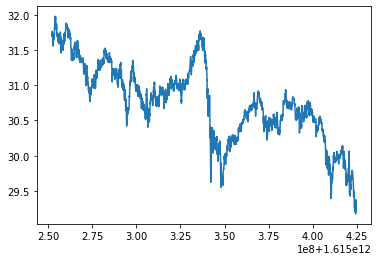

In [4]:
plt.plot(X)

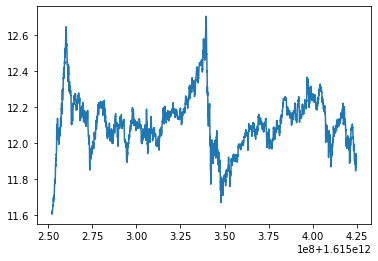

In [5]:
plt.plot(Y)

In [6]:
# params
z_crit = 2
z_sl = 1
z_tp = 1
window = 6*60
trade_size = 100
trainval_split = len(X)//2
# first half of split meets model assumptions by adf test (reject unit root = 1)
# first half of split is training set used to fit Y ~ X
# second half of split is validation set where trading occurs

In [7]:
pt = PairTrader(X, Y, z_crit, z_sl, z_tp, trainval_split, window, trade_size)

In [8]:
pt.fit_model()

In [9]:
account, logs = pt.test_model()

In [10]:
print('Cash Balance:', account.cash_balance)
print('Asset Balance:', account.asset_balance)
print('Total Balance:', account.total_balance)
print('Open Positions:', account.positions)
longs = [i[0] for i in logs if i[1]['status'] == 'L']
shorts = [i[0] for i in logs if i[1]['status'] == 'S']
stop_loss = [i[0] for i in logs if i[1]['status'] == 'SL']
take_profit = [i[0] for i in logs if i[1]['status'] == 'TP']
print('Losses:', len(stop_loss))
print('Profits:', len(take_profit))

Cash Balance: 108.23802900905321
Asset Balance: 0
Total Balance: 108.23802900905321
Open Positions: {}
Losses: 10
Profits: 12


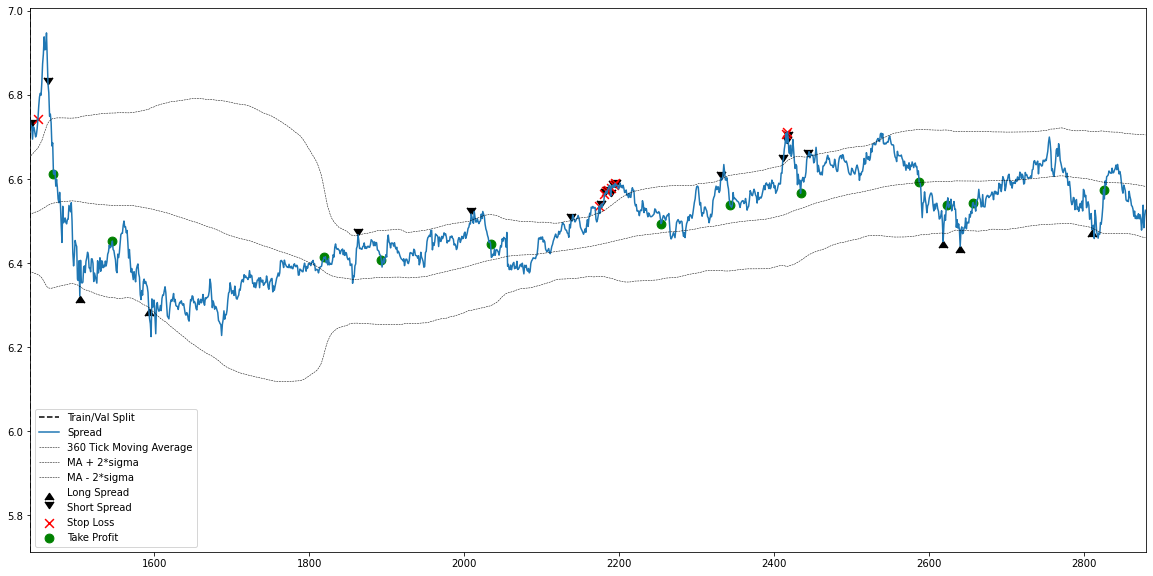

In [11]:
spread_plot = pt.plot('spread', zoom=True)

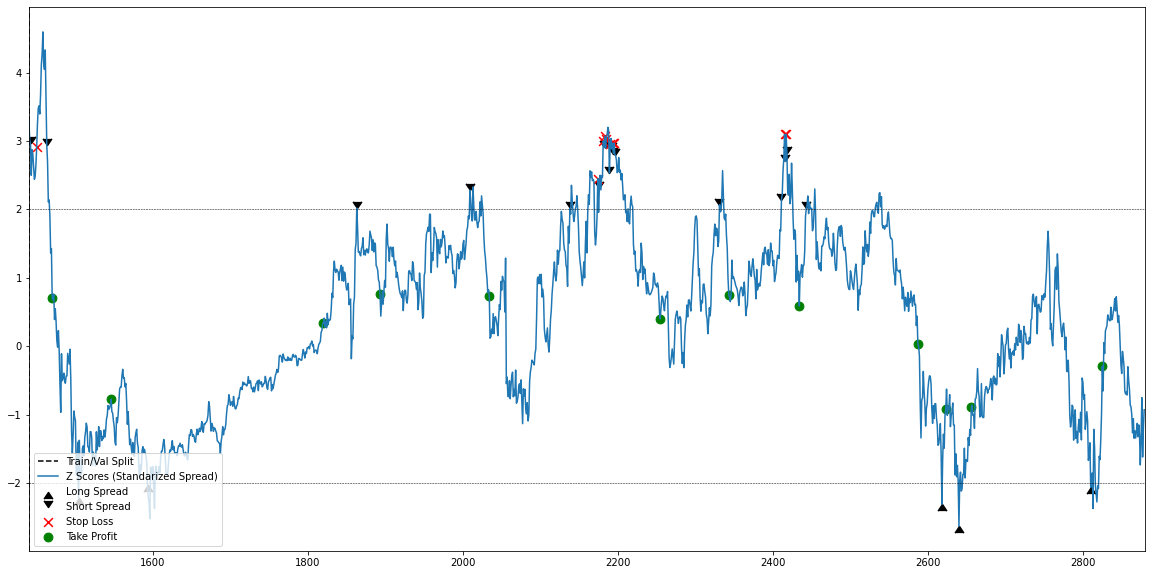

In [12]:
z_plot = pt.plot('z', zoom=True)

In [13]:
df = pt.get_df()
df

,status,spread,stoploss,takeprofit,balance,diffs
1442,S,6.725054,6.727273,6.587527,100.000000,NaN
1450,SL,6.742676,NaN,NaN,99.859371,-1.406293e-01
1463,S,6.825061,6.830921,6.635178,99.859371,0.000000e+00
1470,TP,6.612598,NaN,NaN,101.549988,1.690617e+00
1504,L,6.321534,6.243366,6.444892,101.549988,0.000000e+00
1546,TP,6.452163,NaN,NaN,102.659860,1.109872e+00
1593,L,6.290275,6.176927,6.412364,102.659860,0.000000e+00
1819,TP,6.413799,NaN,NaN,103.705317,1.045457e+00
1863,S,6.467142,6.518367,6.413769,103.705317,0.000000e+00
1893,TP,6.408295,NaN,NaN,104.191391,4.860741e-01


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  1.,  0.,  1.,  1.,  0.,  0.,  2.,  2.,  0.,  0., 21.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.5374797 , -0.51519873, -0.49291776, -0.47063679, -0.44835582,
        -0.42607485, -0.40379388, -0.38151291, -0.35923194, -0.33695097,
        -0.31467   , -0.29238903, -0.27010806, -0.24782709, -0.22554612,
        -0.20326515, -0.18098418, -0.15870321, -0.13642224, -0.11414127,
        -0.0918603 , -0.06957933, -0.04729836, -0.02501739, -0.00273642,
         0.01954455,  0.04182552,  0.06410649,  0.08638746,  0.108668

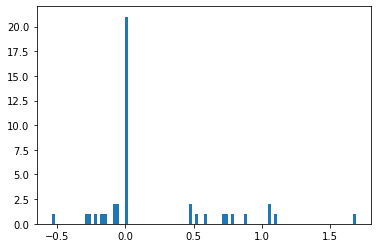

In [14]:
plt.hist(df['diffs'], bins=100)